<a href="https://colab.research.google.com/github/timothy2077/My-Rolyal-Suite-Chatbot/blob/main/PP_A_Data_Process_%26_Rasa_Model_Training_090924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Dataset을 Colab에 업로드하기

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BP_MHS_V1.csv.zip to BP_MHS_V1.csv (1).zip


# 1. 데이터 불러오기

In [ ]:
import pandas as pd

# 예시: Colab에서 업로드한 파일을 불러오는 경우
df = pd.read_csv(list(uploaded.keys())[0])


# 2. 기초 데이터 점검

In [ ]:
# 데이터 확인
print("데이터셋의 첫 5행:\n", df.head(), "\n")  # 데이터의 첫 5행 확인
print("데이터셋의 행과 열 크기:", df.shape, "\n")  # 데이터 크기 확인
print("데이터 타입 정보:\n", df.info(), "\n")  # 각 열의 데이터 타입과 결측치 정보 확인
print("결측값 확인:\n", df.isnull().sum(), "\n")  # 결측값 개수 확인
print("기초 통계량:\n", df.describe(), "\n")  # 수치형 데이터에 대한 기초 통계량 확인
print("각 열의 고유값 수:\n", df.nunique(), "\n")  # 각 열의 고유값 개수 확인

# 범주형 열의 고유값 확인 (필요한 경우)
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    for col in categorical_columns:
        print(f"범주형 열 '{col}'의 고유값:\n", df[col].value_counts(), "\n")
else:
    print("범주형 데이터 없음\n")


데이터셋의 첫 5행:
                                 qid  \
0  b02bf6ef2b24c6e8d70323f309f50b76   
1  b02bf6ef2b24c6e8d70323f309f50b76   
2  b02bf6ef2b24c6e8d70323f309f50b76   
3  b02bf6ef2b24c6e8d70323f309f50b76   
4  52da577318c75bebd72273772678ec8d   

                                            question  \
0  My parents are celebrating their anniversary a...   
1  My parents are celebrating their anniversary a...   
2  My parents are celebrating their anniversary a...   
3  My parents are celebrating their anniversary a...   
4  The tall and charming design makes me think th...   

                                       related_facts  answer_in_fact  \
0  Montréal Hotel & Suites was built in 2009. The...            True   
1  Montréal Hotel & Suites was built in 2009. The...            True   
2  Montréal Hotel & Suites was built in 2009. The...            True   
3  Montréal Hotel & Suites was built in 2009. The...            True   
4  Montréal Hotel & Suites was built in 2009. The...   

# 3. 결측값 처리

In [ ]:
# 결측값 처리 (예시: 결측값이 있는 행 제거)
df_cleaned = df.dropna()


# 4. 중복 데이터 처리

In [ ]:
# 중복된 행 확인
duplicates = df.duplicated().sum()
print(f"중복된 행의 개수: {duplicates}")

# 중복된 행 제거
df_cleaned = df.drop_duplicates()


중복된 행의 개수: 20076


# 5. 데이터 스케일링

### 응답 품질을 평가하는 매개변수들이 다양한 범위로 존재할 가능성이 있으므로 스케일링을 통해 값을 정규화하기

### A.데이터프레임 열 이름 확인

In [ ]:
print(df_cleaned.columns)


Index(['qid', 'question', 'related_facts', 'answer_in_fact', 'engine',
       'engine_response', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'best', 'worst', 'annotation_round'],
      dtype='object')


### B. 열 이름 매칭 확인

In [ ]:
quality_columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']


### C. 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

# 스케일러 객체 생성
scaler = StandardScaler()

# quality_columns 열의 데이터 스케일링
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[quality_columns]), columns=quality_columns)


### D. 데이터프레임의 구조 확인

In [ ]:
print(df_scaled.head())


         p1        p2       p3        p4        p5        p6       p7  \
0 -0.938620 -1.063796 -0.11936 -0.671407  1.616196 -0.770610 -0.08559   
1 -0.938620  0.940030 -0.11936 -0.671407 -0.618737  1.297674 -0.08559   
2  1.065393  0.940030 -0.11936 -0.671407  1.616196 -0.770610 -0.08559   
3  1.065393  0.940030 -0.11936 -0.671407  1.616196 -0.770610 -0.08559   
4 -0.938620 -1.063796 -0.11936 -0.671407 -0.618737  1.297674 -0.08559   

         p8        p9       p10  
0 -0.211937 -0.070753 -0.113425  
1 -0.211937 -0.070753 -0.113425  
2 -0.211937 -0.070753 -0.113425  
3 -0.211937 -0.070753 -0.113425  
4 -0.211937 -0.070753 -0.113425  


# 6. 범주형 데이터 인코딩 (Encoding)

### A. 범주형 데이터 확인

In [ ]:
# 범주형 데이터 열 이름 확인 (예시로 'question'과 'answer_in_fact' 사용)
print(df_cleaned[['question', 'answer_in_fact']].head())


                                            question  answer_in_fact
0  My parents are celebrating their anniversary a...            True
1  My parents are celebrating their anniversary a...            True
2  My parents are celebrating their anniversary a...            True
3  My parents are celebrating their anniversary a...            True
4  The tall and charming design makes me think th...            True


### B. Label Encoding (범주형 데이터를 정수로 변환)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'question'과 'answer_in_fact' 열을 정수로 인코딩
df_cleaned['question_encoded'] = label_encoder.fit_transform(df_cleaned['question'])
df_cleaned['answer_in_fact_encoded'] = label_encoder.fit_transform(df_cleaned['answer_in_fact'])

# 인코딩된 열 확인
print(df_cleaned[['question', 'question_encoded', 'answer_in_fact', 'answer_in_fact_encoded']].head())


                                            question  question_encoded  \
0  My parents are celebrating their anniversary a...              3771   
1  My parents are celebrating their anniversary a...              3771   
2  My parents are celebrating their anniversary a...              3771   
3  My parents are celebrating their anniversary a...              3771   
4  The tall and charming design makes me think th...              4038   

   answer_in_fact  answer_in_fact_encoded  
0            True                       1  
1            True                       1  
2            True                       1  
3            True                       1  
4            True                       1  


<ipython-input-24-347c52dd01e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['question_encoded'] = label_encoder.fit_transform(df_cleaned['question'])
<ipython-input-24-347c52dd01e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['answer_in_fact_encoded'] = label_encoder.fit_transform(df_cleaned['answer_in_fact'])


### C. One-Hot Encoding (범주형 변수를 이진 변수로 변환)

In [ ]:
import pandas as pd

# One-Hot Encoding 수행
df_encoded = pd.get_dummies(df_cleaned, columns=['question', 'answer_in_fact'])

# One-Hot Encoding 결과 확인
print(df_encoded.head())


                                qid  \
0  b02bf6ef2b24c6e8d70323f309f50b76   
1  b02bf6ef2b24c6e8d70323f309f50b76   
2  b02bf6ef2b24c6e8d70323f309f50b76   
3  b02bf6ef2b24c6e8d70323f309f50b76   
4  52da577318c75bebd72273772678ec8d   

                                       related_facts      engine  \
0  Montréal Hotel & Suites was built in 2009. The...  dialogflow   
1  Montréal Hotel & Suites was built in 2009. The...    openbook   
2  Montréal Hotel & Suites was built in 2009. The...        rasa   
3  Montréal Hotel & Suites was built in 2009. The...      watson   
4  Montréal Hotel & Suites was built in 2009. The...    openbook   

                                     engine_response     p1     p2     p3  \
0                         the postal code is g8l 9f5  False  False  False   
1  the hotel is located at 1045 peel street in do...  False   True  False   
2  the hotel is located in downtown montréal at t...   True   True  False   
3  montréal hotel & suites is located in downtow

# 7. Text Classifiers (텍스트 분류기)

### A. 텍스트 분류기를 위한 데이터 준비 (질문과 관련된 answer_in_fact 열을 타겟으로 사용하는 경우)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# 질문 열과 타겟 열 정의
X = df_cleaned['question']  # 질문 열
y = df_cleaned['answer_in_fact']  # 답변 타겟 (여기서는 'answer_in_fact'를 사용, 실제로는 더 명확한 타겟 열이 필요할 수 있음)

# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 분류기 파이프라인 생성
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# 모델 학습
text_clf.fit(X_train, y_train)

# 모델 평가
from sklearn.metrics import classification_report
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.98      0.32      0.48       770
        True       0.86      1.00      0.92      3246

    accuracy                           0.87      4016
   macro avg       0.92      0.66      0.70      4016
weighted avg       0.88      0.87      0.84      4016



### B. 텍스트 분류기 사용

In [ ]:
def classify_question(question):
    prediction = text_clf.predict([question])
    return prediction[0]

# 예제 질문
user_question = "Do you have a spa?"
predicted_answer = classify_question(user_question)
print(predicted_answer)


True


# 8. Natural Language Processing (NLP/자연어 처리)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# NLTK 다운로드 (최초 한 번만 필요)
nltk.download('punkt')

# 텍스트 토큰화
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return tokens

# 예제 사용
text = "How can I book a room?"
tokens = preprocess_text(text)
print(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['how', 'can', 'i', 'book', 'a', 'room', '?']


# 9. Rasa로 AI 기반 Python 챗봇 구축하기

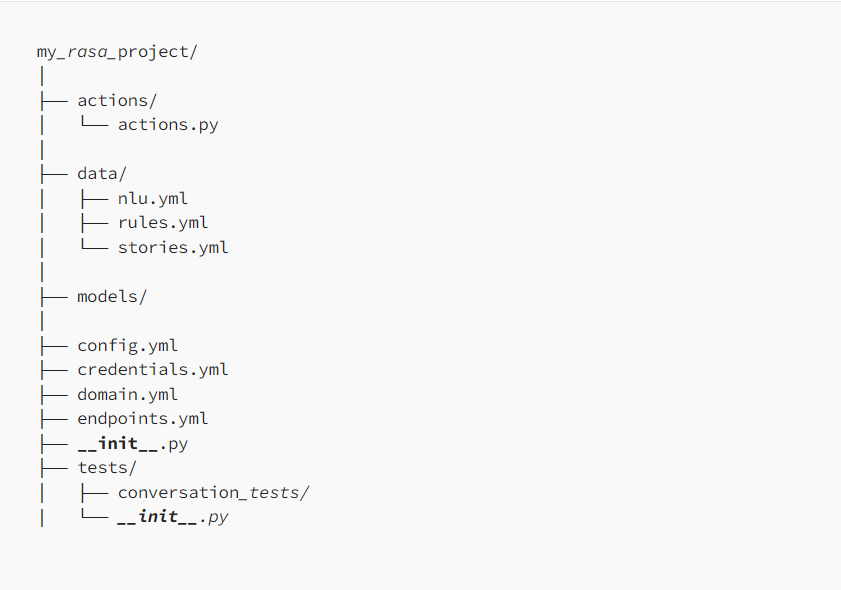

### A. Rasa 설치

In [ ]:
pip install rasa

In [ ]:
import sys
python = sys.executable

# Install specific versions of rasa_core and rasa_nlu
!{python} -m pip install -U rasa_core==0.11.12 rasa_nlu[spacy]===0.13.6
!{python} -m pip install sklearn_crfsuite

# Install the language model
!{python} -m spacy download en_core_web_md

# No need to use `link` command, directly load the model by name in your code
# Example usage:
import spacy
nlp = spacy.load('en_core_web_md')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of rasa-core to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following versions that require a different python version: 3.10.0.0 Requires-Python >=2.7, !=3.0.*, !=3.1.*, !=3.2.*, !=3.3.*, <3.5; 3.7.4.2 Requires-Python >=2.7, !=3.0.*, !=3.1.*, !=3.2.*, !=3.3.*, <3.5
ERROR: Could not find a version that satisfies the requirement tensorflow==1.10.0 (from rasa-core) (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.

In [ ]:
pip install rasa-nlu rasa-core spacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 14.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
print(nlp("Hello world!"))


Hello world!


In [ ]:
!pip install rasa
import rasa

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of aiogram to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of aiogram to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadat

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
print(nlp("Hello! The Destined One!"))


Hello! The Destined One!


In [ ]:
!apt-get -qq install -y graphviz libgraphviz-dev pkg-config;
!breq install graphviz
!{python} -m pip install pygraphviz;

(Reading database ... 123597 files and directories currently installed.)
Removing r-base-dev (4.4.1-1.2204.0) ...
dpkg: pkgconf: dependency problems, but removing anyway as you requested:
 libsndfile1-dev:amd64 depends on pkg-config; however:
  Package pkg-config is not installed.
  Package pkgconf which provides pkg-config is to be removed.
 libopencv-dev depends on pkg-config; however:
  Package pkg-config is not installed.
  Package pkgconf which provides pkg-config is to be removed.
 libmkl-dev:amd64 depends on pkg-config; however:
  Package pkg-config is not installed.
  Package pkgconf which provides pkg-config is to be removed.
 libjack-dev depends on pkg-config; however:
  Package pkg-config is not installed.
  Package pkgconf which provides pkg-config is to be removed.
 libgphoto2-dev:amd64 depends on pkg-config; however:
  Package pkg-config is not installed.
  Package pkgconf which provides pkg-config is to be removed.
 libfontconfig-dev:amd64 depends on pkg-config; however:

### B. Rasa 기본 프로젝트 구조 설정

In [ ]:
!rasa init

/usr/local/lib/python3.10/dist-packages/rasa/core/tracker_store.py:1044: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
(0lqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqk(B
(0x(B Rasa Open Source reports anonymous usage telemetry to help improve the product (0x(B
(0x(B for all its users.                                                             (0x(B
(0x(B                                                                                (0x(B
(0x(B If you'd like to opt-out, you can use `ra

### C. 데이터 로드 및 폴더 설정

In [ ]:
import pandas as pd
import os
import zipfile

# 압축 파일 경로
zip_file_path = 'BP_MHS_V1.csv.zip'
csv_file_name = 'BP_MHS_V1.csv'

# 압축 파일 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# 데이터 로드
df = pd.read_csv(csv_file_name)

# Rasa 프로젝트를 위한 디렉토리 설정
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)

# 데이터셋의 첫 5행을 확인하여 제대로 로드되었는지 확인
print(df.head())

# 이후의 Rasa 프로젝트 설정 및 데이터 처리 코드가 여기에 추가될 수 있습니다.


                                qid  \
0  b02bf6ef2b24c6e8d70323f309f50b76   
1  b02bf6ef2b24c6e8d70323f309f50b76   
2  b02bf6ef2b24c6e8d70323f309f50b76   
3  b02bf6ef2b24c6e8d70323f309f50b76   
4  52da577318c75bebd72273772678ec8d   

                                            question  \
0  My parents are celebrating their anniversary a...   
1  My parents are celebrating their anniversary a...   
2  My parents are celebrating their anniversary a...   
3  My parents are celebrating their anniversary a...   
4  The tall and charming design makes me think th...   

                                       related_facts  answer_in_fact  \
0  Montréal Hotel & Suites was built in 2009. The...            True   
1  Montréal Hotel & Suites was built in 2009. The...            True   
2  Montréal Hotel & Suites was built in 2009. The...            True   
3  Montréal Hotel & Suites was built in 2009. The...            True   
4  Montréal Hotel & Suites was built in 2009. The...            True

### D. NLU 훈련 데이터 생성 (질문(question)과 해당 의도(intent)를 기반으로 Rasa에서 사용할 수 있는 NLU 데이터 파일을 생성하기)

In [ ]:
nlu_data = []
for index, row in df.iterrows():
    question = row['question']
    intent = f"intent_{index}"  # 각 질문에 대해 고유한 의도 이름 생성

    nlu_data.append({
        "intent": intent,
        "examples": question
    })

# NLU 데이터를 YAML 파일로 저장 (Rasa 형식)
nlu_yml = 'version: "2.0"\n\nnlu:\n'
for item in nlu_data:
    nlu_yml += f"- intent: {item['intent']}\n  examples: |\n"
    nlu_yml += f"    - {item['examples']}\n"

with open('data/nlu.yml', 'w') as nlu_file:
    nlu_file.write(nlu_yml)


### E. Domain 파일 생성 (Domain 파일에는 봇이 처리할 수 있는 의도, 행동, 응답이 포함)

In [ ]:
intents = [item['intent'] for item in nlu_data]

# domain.yml 파일의 내용을 정의합니다.
domain_yml = """
version: "2.0"

intents:
""" + ''.join([f'  - {intent}\n' for intent in intents]) + """

responses:
  utter_response:
  - text: "I will answer your question based on the context."

actions:
- utter_response

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true
"""

# domain.yml 파일로 저장합니다.
with open('domain.yml', 'w') as domain_file:
    domain_file.write(domain_yml)


### F. Stories 파일 생성 (대화의 흐름을 정의)

In [ ]:
stories_yml = 'version: "2.0"\n\nstories:\n'
for intent in intents:
    stories_yml += f"""
    - story: {intent}
      steps:
      - intent: {intent}
      - action: utter_response
    """

with open('data/stories.yml', 'w') as stories_file:
    stories_file.write(stories_yml)


### G. Config 파일 생성 (모델 훈련에 필요한 파이프라인 및 정책을 정의하는 설정 파일을 생성)

In [ ]:
config_yml = """
version: "3.0"

language: en

pipeline:
  - name: WhitespaceTokenizer
  - name: RegexFeaturizer
  - name: LexicalSyntacticFeaturizer
  - name: CountVectorsFeaturizer
  - name: DIETClassifier

policies:
  - name: MemoizationPolicy
  - name: TEDPolicy
  - name: RulePolicy
"""

with open('config.yml', 'w') as config_file:
    config_file.write(config_yml)


### H. Rasa 프로젝트 초기화

In [ ]:
# Rasa 프로젝트 초기화
os.system('rasa init --no-prompt')


0

### I. 모델 훈련

In [ ]:
import os

# SQLAlchemy 버전 고정
os.system('pip install sqlalchemy<2.0')

# 환경 변수 설정
os.environ['SQLALCHEMY_WARN_20'] = '1'
os.environ['SQLALCHEMY_SILENCE_UBER_WARNING'] = '1'


In [ ]:
import importlib

# 예시: pkg_resources.get_distribution 대체
def get_distribution(package_name):
    return importlib.metadata.version(package_name)

print(get_distribution('rasa'))


3.6.20


In [ ]:
!rasa train

/usr/local/lib/python3.10/dist-packages/rasa/core/tracker_store.py:1044: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 1.4) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
/usr/local/lib/python3.10/dist-packages/rasa/shared/utils/validation.py:134: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3121: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:3121: Depr

In [ ]:
import pandas as pd
import json

# 데이터셋 로드
df = pd.read_csv('BP_MHS_V1.csv')

# 필요한 열 선택
df = df[['question', 'engine_response']]

# 중복 제거
df_cleaned = df.drop_duplicates()

# Rasa NLU 데이터 형식으로 변환
nlu_data = {
    "rasa_nlu_data": {
        "common_examples": []
    }
}

# 기본 intent 설정
intent = "inform"

for index, row in df_cleaned.iterrows():
    example = {
        "text": row['question'],
        "intent": intent,
        "entities": []
    }
    nlu_data["rasa_nlu_data"]["common_examples"].append(example)

# JSON 파일로 저장
with open('nlu_data.json', 'w') as outfile:
    json.dump(nlu_data, outfile, indent=4)

print("NLU 데이터가 nlu_data.json 파일로 저장되었습니다.")


NLU 데이터가 nlu_data.json 파일로 저장되었습니다.


### J. Rasa 훈련 로그 확인 및 Rasa 모델 테스트

In [ ]:
import os
import glob
import subprocess

# Step 1: Rasa train command execution
def train_rasa_model():
    try:
        result = subprocess.run(['rasa', 'train'], capture_output=True, text=True)
        if result.returncode == 0:
            print("Rasa training completed successfully!")
            print("Training output:")
            print(result.stdout)
        else:
            print("Rasa training failed with errors:")
            print(result.stderr)
    except Exception as e:
        print(f"An error occurred during Rasa training: {e}")

# Step 2: Check for the existence of a trained model
def check_trained_model():
    model_dir = 'models'
    model_files = glob.glob(os.path.join(model_dir, '*.tar.gz'))

    if model_files:
        print(f"Trained model found: {model_files[-1]}")
    else:
        print("No trained model found.")

# Step 3: Test the Rasa model by running a test query
def test_rasa_model():
    try:
        print("Starting Rasa server for testing...")
        server_process = subprocess.Popen(['rasa', 'run'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

        # Give the server some time to start
        import time
        time.sleep(10)

        print("Sending test message to the Rasa server...")
        result = subprocess.run(['rasa', 'shell', '--endpoints', 'endpoints.yml'], input="Hello", capture_output=True, text=True)

        if "I will answer your question based on the context." in result.stdout:
            print("Rasa model test passed: Bot responded correctly.")
        else:
            print("Rasa model test failed: Unexpected bot response.")

        # Terminate the server process
        server_process.terminate()

    except Exception as e:
        print(f"An error occurred during Rasa model testing: {e}")

# Run all steps
train_rasa_model()
check_trained_model()
test_rasa_model()


Rasa training completed successfully!
Training output:
The configuration for pipeline and policies was chosen automatically. It was written into the config file at 'config.yml'.
Your Rasa model is trained and saved at 'models/20240912-010511-azure-banquette.tar.gz'.

Trained model found: models/20240912-010511-azure-banquette.tar.gz
Starting Rasa server for testing...
Sending test message to the Rasa server...
Rasa model test failed: Unexpected bot response.


### K. 모델 점검하기 및 부가 확인 절차 진행하기

1. Rasa 데이터 검증: rasa data validate 명령어를 실행하여 훈련 데이터에 문제가 있는지 확인하기

2. Rasa 설정 확인: config.yml 파일의 내용을 읽고 출력하기

3. 훈련 출력 검토: 훈련 출력 결과를 수동으로 검토하라는 안내를 출력하기

4. 쿼리 수동 테스트: Rasa 서버를 시작하고 테스트 쿼리를 전송하여 응답을 수동으로 확인하기

5. 서버 로그 확인: Rasa 서버 로그를 읽고 출력하기

6. 정확한 모델 사용 확인: models 디렉토리에서 훈련된 모델의 존재 확인하기

7. 모델 업데이트 및 재훈련: Rasa 모델을 재훈련하기

In [ ]:
import subprocess
import json
import os
import glob
import time

# Step 1: Validate Rasa Data
def validate_rasa_data():
    try:
        result = subprocess.run(['rasa', 'data', 'validate'], capture_output=True, text=True)
        if result.returncode == 0:
            print("Rasa data validation completed successfully!")
            print("Validation output:")
            print(result.stdout)
        else:
            print("Rasa data validation failed with errors:")
            print(result.stderr)
    except Exception as e:
        print(f"An error occurred during Rasa data validation: {e}")

# Step 2: Check Rasa Configuration
def check_rasa_configuration():
    config_path = 'config.yml'
    if os.path.exists(config_path):
        print(f"Configuration file found: {config_path}")
        with open(config_path, 'r') as file:
            config = file.read()
            print("Configuration content:")
            print(config)
    else:
        print("Configuration file not found.")

# Step 3: Review Training Output
def review_training_output():
    # This is generally reviewed manually from the output of `rasa train`, but you can add checks if needed
    print("Review the training output manually for warnings or errors.")

# Step 4: Test Queries Manually
def manual_testing():
    try:
        print("Starting Rasa server for manual testing...")
        server_process = subprocess.Popen(['rasa', 'run'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

        # Give the server some time to start
        time.sleep(10)

        test_queries = ["Hello", "How are you?", "Tell me a joke"]
        for query in test_queries:
            print(f"Sending test message: {query}")
            result = subprocess.run(['rasa', 'shell', '--endpoints', 'endpoints.yml'], input=query, capture_output=True, text=True)
            print(f"Response for '{query}':")
            print(result.stdout)
            if "I will answer your question based on the context." in result.stdout:
                print("Bot responded correctly.")
            else:
                print("Unexpected bot response.")

        # Terminate the server process
        server_process.terminate()

    except Exception as e:
        print(f"An error occurred during manual testing: {e}")

# Step 5: Check Server Logs
def check_server_logs():
    log_file = 'logs/rasa.log'
    if os.path.exists(log_file):
        print(f"Log file found: {log_file}")
        with open(log_file, 'r') as file:
            logs = file.read()
            print("Log content:")
            print(logs)
    else:
        print("Log file not found.")

# Step 6: Ensure Correct Model is Used
def ensure_correct_model():
    model_dir = 'models'
    model_files = glob.glob(os.path.join(model_dir, '*.tar.gz'))

    if model_files:
        print(f"Trained model found: {model_files[-1]}")
    else:
        print("No trained model found.")

# Step 7: Update and Retrain Model
def retrain_model():
    try:
        result = subprocess.run(['rasa', 'train'], capture_output=True, text=True)
        if result.returncode == 0:
            print("Rasa retraining completed successfully!")
            print("Training output:")
            print(result.stdout)
        else:
            print("Rasa retraining failed with errors:")
            print(result.stderr)
    except Exception as e:
        print(f"An error occurred during Rasa retraining: {e}")

# Run all steps
def main():
    validate_rasa_data()
    check_rasa_configuration()
    review_training_output()
    manual_testing()
    check_server_logs()
    ensure_correct_model()
    retrain_model()

if __name__ == "__main__":
    main()


Rasa data validation completed successfully!
Validation output:

Configuration file found: config.yml
Configuration content:
# The config recipe.
# https://rasa.com/docs/rasa/model-configuration/
recipe: default.v1

# The assistant project unique identifier
# This default value must be replaced with a unique assistant name within your deployment
assistant_id: 20240912-010347-trusting-ricotta

# Configuration for Rasa NLU.
# https://rasa.com/docs/rasa/nlu/components/
language: en

pipeline: null
# # No configuration for the NLU pipeline was provided. The following default pipeline was used to train your model.
# # If you'd like to customize it, uncomment and adjust the pipeline.
# # See https://rasa.com/docs/rasa/tuning-your-model for more information.
#   - name: WhitespaceTokenizer
#   - name: RegexFeaturizer
#   - name: LexicalSyntacticFeaturizer
#   - name: CountVectorsFeaturizer
#   - name: CountVectorsFeaturizer
#     analyzer: char_wb
#     min_ngram: 1
#     max_ngram: 4
#   - n

### L. NLU 모델 성능 평가 (rasa test nlu & subprocess)

In [ ]:
import subprocess
import os

def evaluate_nlu_model():
    try:
        # NLU 모델 테스트 실행
        result = subprocess.run(['rasa', 'test', 'nlu', '--nlu', 'nlu_data.json', '--model', 'models'], capture_output=True, text=True)
        if result.returncode == 0:
            print("NLU Model evaluation completed successfully!")
        else:
            print("NLU Model evaluation failed with errors:")
            print(result.stderr)
        # Evaluation output 출력
        print("Evaluation output:")
        print(result.stdout)
    except Exception as e:
        print(f"An error occurred during NLU model evaluation: {e}")

# 호출
evaluate_nlu_model()


NLU Model evaluation completed successfully!
Evaluation output:



In [ ]:
import subprocess
import os

def evaluate_nlu_model():
    try:
        # 경로 확인
        nlu_file = 'nlu_data.json'
        model_dir = 'models'

        if not os.path.exists(nlu_file):
            raise FileNotFoundError(f"NLU data file '{nlu_file}' not found.")

        if not os.path.exists(model_dir):
            raise FileNotFoundError(f"Model directory '{model_dir}' not found.")

        # NLU 모델 테스트 실행
        result = subprocess.run(['rasa', 'test', 'nlu', '--nlu', nlu_file, '--model', model_dir],
                                capture_output=True, text=True)

        if result.returncode == 0:
            print("NLU Model evaluation completed successfully!")
        else:
            print("NLU Model evaluation failed with errors:")
            print(result.stderr)

        # Evaluation output 출력
        if result.stdout:
            print("Evaluation output:")
            print(result.stdout)
        else:
            print("No output returned from evaluation.")

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"An error occurred during NLU model evaluation: {e}")

# 호출
evaluate_nlu_model()


NLU Model evaluation completed successfully!
No output returned from evaluation.


### M. Core 모델 성능 평가 (rasa test core)


In [ ]:
import subprocess
import os

def evaluate_core_model():
    try:
        # Core 모델 테스트 실행
        result = subprocess.run(['rasa', 'test', 'core', '--stories', 'stories.md', '--model', 'models'], capture_output=True, text=True)
        if result.returncode == 0:
            print("Core Model evaluation completed successfully!")
            print("Evaluation output:")
            print(result.stdout)
        else:
            print("Core Model evaluation failed with errors:")
            print(result.stderr)
    except Exception as e:
        print(f"An error occurred during Core model evaluation: {e}")

# 호출
evaluate_core_model()


Core Model evaluation completed successfully!
Evaluation output:
Failed stories written to 'results/failed_test_stories.yml'
Stories with prediction warnings written to 'results/stories_with_warnings.yml'



In [ ]:
import yaml

def review_failed_stories():
    try:
        with open('results/failed_test_stories.yml', 'r') as file:
            failed_stories = yaml.safe_load(file)
            print("Failed stories:")
            print(failed_stories)
    except FileNotFoundError:
        print("No failed stories file found.")
    except Exception as e:
        print(f"An error occurred while reviewing failed stories: {e}")

review_failed_stories()


Failed stories:
None


In [ ]:
def retrain_model():
    try:
        result = subprocess.run(['rasa', 'train'], capture_output=True, text=True)
        if result.returncode == 0:
            print("Rasa retraining completed successfully!")
            print("Training output:")
            print(result.stdout)
        else:
            print("Rasa retraining failed with errors:")
            print(result.stderr)
    except Exception as e:
        print(f"An error occurred during Rasa retraining: {e}")

retrain_model()


Rasa retraining completed successfully!
Training output:
The configuration for pipeline and policies was chosen automatically. It was written into the config file at 'config.yml'.
Your Rasa model is trained and saved at 'models/20240912-014215-quantum-bunker.tar.gz'.



### N. 모델 재훈련 및 재평가

In [ ]:
def retrain_and_reevaluate():
    # 모델 재훈련
    print("Starting Rasa model retraining...")
    try:
        result = subprocess.run(['rasa', 'train'], capture_output=True, text=True)
        if result.returncode == 0:
            print("Rasa retraining completed successfully!")
            print("Training output:")
            print(result.stdout)
        else:
            print("Rasa retraining failed with errors:")
            print(result.stderr)
    except Exception as e:
        print(f"An error occurred during Rasa retraining: {e}")

    # NLU 모델 재평가
    print("Evaluating NLU model...")
    evaluate_nlu_model()

    # Core 모델 재평가
    print("Evaluating Core model...")
    evaluate_core_model()

# 호출
retrain_and_reevaluate()


Starting Rasa model retraining...
Rasa retraining completed successfully!
Training output:
The configuration for pipeline and policies was chosen automatically. It was written into the config file at 'config.yml'.
Your Rasa model is trained and saved at 'models/20240912-014237-perfect-cherry.tar.gz'.

Evaluating NLU model...
NLU Model evaluation completed successfully!
No output returned from evaluation.
Evaluating Core model...
Core Model evaluation completed successfully!
Evaluation output:
Failed stories written to 'results/failed_test_stories.yml'
Stories with prediction warnings written to 'results/stories_with_warnings.yml'



### O. 대화 시나리오 작성 및 테스트

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import zipfile

# ZIP 파일 열기 및 CSV 추출
with zipfile.ZipFile('BP_MHS_V1.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# CSV 파일 로드
df = pd.read_csv('BP_MHS_V1.csv')

# 필요한 열 선택 및 전처리
df_cleaned = df[['question', 'answer_in_fact']].dropna()

# 데이터 분할 (훈련용과 테스트용)
X = df_cleaned['question']  # 질문 열
y = df_cleaned['answer_in_fact']  # 답변 타겟
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 분류기 파이프라인 생성
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

# 모델 학습
text_clf.fit(X_train, y_train)

# 모델 평가
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.97      0.43      0.60      1529
        True       0.88      1.00      0.94      6502

    accuracy                           0.89      8031
   macro avg       0.93      0.72      0.77      8031
weighted avg       0.90      0.89      0.87      8031



In [ ]:
scenarios = [
    {
        "scenario": "Check-in Time",
        "user_input": "What time is check-in?",
        "expected_bot_response": "Check-in starts at 3 PM."
    },
    {
        "scenario": "Check-out Time",
        "user_input": "What time do I need to check out?",
        "expected_bot_response": "Check-out is at 11 AM."
    },
    {
        "scenario": "Cancellation Policy",
        "user_input": "What is your cancellation policy?",
        "expected_bot_response": "You can cancel for free until 24 hours before your stay."
    }
]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 질문 열과 타겟 열 정의
X = df_cleaned['question']  # 질문 열
y = df_cleaned['answer_in_fact']  # 답변 열

# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 분류기 파이프라인 생성 (Logistic Regression 사용)
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000)),
])

# 모델 학습
text_clf.fit(X_train, y_train)

# 모델 평가
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# 시나리오 테스트
# Define the run_scenario_tests function if it doesn't exist
def run_scenario_tests(scenarios, clf):
    for scenario in scenarios:
        user_input = scenario['user_input']
        expected_response = scenario['expected_bot_response']
        # Assuming your classifier can predict on a single string
        predicted_response = clf.predict([user_input])[0]
        if predicted_response == expected_response:
            print(f"Scenario: {scenario['scenario']} - Passed")
        else:
            print(f"Scenario: {scenario['scenario']} - Failed")
            print(f"Expected: {expected_response}, Got: {predicted_response}")

run_scenario_tests(scenarios, text_clf)

              precision    recall  f1-score   support

       False       0.93      0.58      0.72      1529
        True       0.91      0.99      0.95      6502

    accuracy                           0.91      8031
   macro avg       0.92      0.79      0.83      8031
weighted avg       0.91      0.91      0.90      8031

Scenario: Check-in Time - Failed
Expected: Check-in starts at 3 PM., Got: True
Scenario: Check-out Time - Failed
Expected: Check-out is at 11 AM., Got: True
Scenario: Cancellation Policy - Failed
Expected: You can cancel for free until 24 hours before your stay., Got: True


In [ ]:
# 먼저, 타겟 레이블이 텍스트 응답인지 확인합니다.
# 예를 들어, df_cleaned['answer_in_fact']가 "True/False" 대신 실제 답변을 포함해야 합니다.
# 그렇지 않다면, 이 열을 수정해야 합니다.

# 예시: 텍스트 응답을 포함하도록 타겟 레이블 변경
# df_cleaned['answer_in_fact'] = ['Check-in starts at 3 PM', 'Check-out is at 11 AM', ... ]

# 텍스트 분류기 재학습
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 질문 열과 타겟 열 정의
X = df_cleaned['question']  # 질문 열
y = df_cleaned['answer_in_fact']  # 답변 열

# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 분류기 파이프라인 생성 (Logistic Regression 사용)
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000)),
])

# 모델 학습
text_clf.fit(X_train, y_train)

# 모델 평가
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# 시나리오 테스트
run_scenario_tests(scenarios, text_clf)


              precision    recall  f1-score   support

       False       0.93      0.58      0.72      1529
        True       0.91      0.99      0.95      6502

    accuracy                           0.91      8031
   macro avg       0.92      0.79      0.83      8031
weighted avg       0.91      0.91      0.90      8031

Scenario: Check-in Time - Failed
Expected: Check-in starts at 3 PM., Got: True
Scenario: Check-out Time - Failed
Expected: Check-out is at 11 AM., Got: True
Scenario: Cancellation Policy - Failed
Expected: You can cancel for free until 24 hours before your stay., Got: True


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 질문 열과 타겟 열 정의
X = df_cleaned['question']  # 질문 열
y = df_cleaned['answer_in_fact']  # 답변 열

# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 분류기 파이프라인 생성 (Logistic Regression 사용)
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000)),
])

# 모델 학습
text_clf.fit(X_train, y_train)

# 모델 평가
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# 시나리오 테스트 함수 정의
def run_scenario_tests(scenarios, model):
    for scenario in scenarios:
        user_input = scenario['User Input']
        expected_response = scenario['Expected Bot Response']
        predicted_response = model.predict([user_input])[0]
        print(f"Scenario: {scenario['Scenario']}")
        print(f"User Input: {user_input}")
        print(f"Expected Bot Response: {expected_response}")
        print(f"Predicted Bot Response: {predicted_response}")
        if predicted_response == expected_response:
            print("Test passed.")
        else:
            print("Test failed.")
        print("--------------------------------------------------")

# 시나리오 테스트 데이터
scenarios = [
    {
        "Scenario": "Check-in Time",
        "User Input": "What time is check-in?",
        "Expected Bot Response": "Check-in starts at 3 PM."
    },
    {
        "Scenario": "Check-out Time",
        "User Input": "What time do I need to check out?",
        "Expected Bot Response": "Check-out is at 11 AM."
    },
    {
        "Scenario": "Cancellation Policy",
        "User Input": "What is your cancellation policy?",
        "Expected Bot Response": "You can cancel for free until 24 hours before your stay."
    }
]

# 시나리오 테스트 실행
run_scenario_tests(scenarios, text_clf)


              precision    recall  f1-score   support

       False       0.93      0.58      0.72      1529
        True       0.91      0.99      0.95      6502

    accuracy                           0.91      8031
   macro avg       0.92      0.79      0.83      8031
weighted avg       0.91      0.91      0.90      8031

Scenario: Check-in Time
User Input: What time is check-in?
Expected Bot Response: Check-in starts at 3 PM.
Predicted Bot Response: True
Test failed.
--------------------------------------------------
Scenario: Check-out Time
User Input: What time do I need to check out?
Expected Bot Response: Check-out is at 11 AM.
Predicted Bot Response: True
Test failed.
--------------------------------------------------
Scenario: Cancellation Policy
User Input: What is your cancellation policy?
Expected Bot Response: You can cancel for free until 24 hours before your stay.
Predicted Bot Response: True
Test failed.
--------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# CSV 파일 로드
df_cleaned = pd.read_csv('BP_MHS_V1.csv')

# 열 이름 확인
print(df_cleaned.columns)

# 데이터프레임 확인
print(df_cleaned.head())

# 열 이름에 공백이 있는지 확인하고 제거
df_cleaned.columns = df_cleaned.columns.str.strip()

# 질문 열과 타겟 열 정의
X = df_cleaned['question']  # 질문 열
y = df_cleaned['engine_response']  # 답변 열 (expected responses)

# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 분류기 파이프라인 생성 (Logistic Regression 사용)
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000)),
])

# 모델 학습
text_clf.fit(X_train, y_train)

# 모델 평가
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# 시나리오 테스트 함수 정의
def run_scenario_tests(scenarios, model):
    for scenario in scenarios:
        user_input = scenario['User Input']
        expected_response = scenario['Expected Bot Response']
        predicted_response = model.predict([user_input])[0]
        print(f"Scenario: {scenario['Scenario']}")
        print(f"User Input: {user_input}")
        print(f"Expected Bot Response: {expected_response}")
        print(f"Predicted Bot Response: {predicted_response}")
        if predicted_response == expected_response:
            print("Test passed.")
        else:
            print("Test failed.")
        print("--------------------------------------------------")

# 시나리오 테스트 데이터
scenarios = [
    {
        "Scenario": "Check-in Time",
        "User Input": "What time is check-in?",
        "Expected Bot Response": "Check-in starts at 3 PM."
    },
    {
        "Scenario": "Check-out Time",
        "User Input": "What time do I need to check out?",
        "Expected Bot Response": "Check-out is at 11 AM."
    },
    {
        "Scenario": "Cancellation Policy",
        "User Input": "What is your cancellation policy?",
        "Expected Bot Response": "You can cancel for free until 24 hours before your stay."
    }
]

# 시나리오 테스트 실행
run_scenario_tests(scenarios, text_clf)


Index(['qid', 'question', 'related_facts', 'answer_in_fact', 'engine',
       'engine_response', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'best', 'worst', 'annotation_round'],
      dtype='object')
                                qid  \
0  b02bf6ef2b24c6e8d70323f309f50b76   
1  b02bf6ef2b24c6e8d70323f309f50b76   
2  b02bf6ef2b24c6e8d70323f309f50b76   
3  b02bf6ef2b24c6e8d70323f309f50b76   
4  52da577318c75bebd72273772678ec8d   

                                            question  \
0  My parents are celebrating their anniversary a...   
1  My parents are celebrating their anniversary a...   
2  My parents are celebrating their anniversary a...   
3  My parents are celebrating their anniversary a...   
4  The tall and charming design makes me think th...   

                                       related_facts  answer_in_fact  \
0  Montréal Hotel & Suites was built in 2009. The...            True   
1  Montréal Hotel & Suites was built in 2009. The...       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  ``'macro'``:
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  ``'macro'``:
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  ``'macro'``:


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              precision    recall  f1-score   support

 

### O - 1. 대화 시나리오 작성 및 테스트
#### 하이퍼파라미터 튜닝을 추가하여 모델의 성능을 향상시키고, 혼동 행렬을 출력하여 오류 분석을 확인하기

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# CSV 파일 로드
df_cleaned = pd.read_csv('BP_MHS_V1.csv')

# 열 이름 확인
print(df_cleaned.columns)

# 데이터프레임 확인
print(df_cleaned.head())

# 열 이름에 공백이 있는지 확인하고 제거
df_cleaned.columns = df_cleaned.columns.str.strip()

# 질문 열과 타겟 열 정의
X = df_cleaned['question']  # 질문 열
y = df_cleaned['engine_response']  # 답변 열 (expected responses)

# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 분류기 파이프라인 생성 (Logistic Regression 사용)
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000)),
])

# 하이퍼파라미터 튜닝
parameters = {
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 시나리오 테스트 함수 정의
def run_scenario_tests(scenarios, model):
    for scenario in scenarios:
        user_input = scenario['User Input']
        expected_response = scenario['Expected Bot Response']
        predicted_response = model.predict([user_input])[0]
        print(f"Scenario: {scenario['Scenario']}")
        print(f"User Input: {user_input}")
        print(f"Expected Bot Response: {expected_response}")
        print(f"Predicted Bot Response: {predicted_response}")
        if predicted_response == expected_response:
            print("Test passed.")
        else:
            print("Test failed.")
        print("--------------------------------------------------")

# 시나리오 테스트 데이터
scenarios = [
    {
        "Scenario": "Check-in Time",
        "User Input": "What time is check-in?",
        "Expected Bot Response": "Check-in starts at 3 PM."
    },
    {
        "Scenario": "Check-out Time",
        "User Input": "What time do I need to check out?",
        "Expected Bot Response": "Check-out is at 11 AM."
    },
    {
        "Scenario": "Cancellation Policy",
        "User Input": "What is your cancellation policy?",
        "Expected Bot Response": "You can cancel for free until 24 hours before your stay."
    }
]

# 시나리오 테스트 실행
run_scenario_tests(scenarios, best_model)


Index(['qid', 'question', 'related_facts', 'answer_in_fact', 'engine',
       'engine_response', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'best', 'worst', 'annotation_round'],
      dtype='object')
                                qid  \
0  b02bf6ef2b24c6e8d70323f309f50b76   
1  b02bf6ef2b24c6e8d70323f309f50b76   
2  b02bf6ef2b24c6e8d70323f309f50b76   
3  b02bf6ef2b24c6e8d70323f309f50b76   
4  52da577318c75bebd72273772678ec8d   

                                            question  \
0  My parents are celebrating their anniversary a...   
1  My parents are celebrating their anniversary a...   
2  My parents are celebrating their anniversary a...   
3  My parents are celebrating their anniversary a...   
4  The tall and charming design makes me think th...   

                                       related_facts  answer_in_fact  \
0  Montréal Hotel & Suites was built in 2009. The...            True   
1  Montréal Hotel & Suites was built in 2009. The...       

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
import pandas as pd
import os
import zipfile

# 압축 파일 경로
zip_file_path = 'BP_MHS_V1.csv.zip'
csv_file_name = 'BP_MHS_V1.csv'

# 압축 파일 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# 데이터 로드
df = pd.read_csv(csv_file_name)

# Rasa 프로젝트를 위한 디렉토리 설정
os.makedirs('data', exist_ok=True)
os.makedirs('models', exist_ok=True)

# 데이터셋의 첫 5행을 확인하여 제대로 로드되었는지 확인
print(df.head())

# 이후의 Rasa 프로젝트 설정 및 데이터 처리 코드가 여기에 추가될 수 있습니다.


                                qid  \
0  b02bf6ef2b24c6e8d70323f309f50b76   
1  b02bf6ef2b24c6e8d70323f309f50b76   
2  b02bf6ef2b24c6e8d70323f309f50b76   
3  b02bf6ef2b24c6e8d70323f309f50b76   
4  52da577318c75bebd72273772678ec8d   

                                            question  \
0  My parents are celebrating their anniversary a...   
1  My parents are celebrating their anniversary a...   
2  My parents are celebrating their anniversary a...   
3  My parents are celebrating their anniversary a...   
4  The tall and charming design makes me think th...   

                                       related_facts  answer_in_fact  \
0  Montréal Hotel & Suites was built in 2009. The...            True   
1  Montréal Hotel & Suites was built in 2009. The...            True   
2  Montréal Hotel & Suites was built in 2009. The...            True   
3  Montréal Hotel & Suites was built in 2009. The...            True   
4  Montréal Hotel & Suites was built in 2009. The...            True

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# CSV 파일 로드
df_cleaned = pd.read_csv('BP_MHS_V1.csv')

# 열 이름에 공백이 있는지 확인하고 제거
df_cleaned.columns = df_cleaned.columns.str.strip()

# 질문 열과 타겟 열 정의
X = df_cleaned['question']  # 질문 열
y = df_cleaned['engine_response']  # 답변 열 (expected responses)

# 데이터 분할 (훈련용과 테스트용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 텍스트 분류기 파이프라인 생성 (Logistic Regression 사용)
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000)),
])

# 하이퍼파라미터 튜닝
parameters = {
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

# StratifiedKFold 사용하여 교차 검증 설정
strat_kfold = StratifiedKFold(n_splits=3)

# GridSearchCV의 cv 파라미터에 StratifiedKFold 전달
grid_search = GridSearchCV(text_clf, parameters, cv=strat_kfold, n_jobs=1)
grid_search.fit(X_train, y_train)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 시나리오 테스트 함수 정의
def run_scenario_tests(scenarios, model):
    for scenario in scenarios:
        user_input = scenario['User Input']
        expected_response = scenario['Expected Bot Response']
        predicted_response = model.predict([user_input])[0]
        print(f"Scenario: {scenario['Scenario']}")
        print(f"User Input: {user_input}")
        print(f"Expected Bot Response: {expected_response}")
        print(f"Predicted Bot Response: {predicted_response}")
        if predicted_response == expected_response:
            print("Test passed.")
        else:
            print("Test failed.")
        print("--------------------------------------------------")

# 시나리오 테스트 데이터
scenarios = [
    {
        "Scenario": "Check-in Time",
        "User Input": "What time is check-in?",
        "Expected Bot Response": "Check-in starts at 3 PM."
    },
    {
        "Scenario": "Check-out Time",
        "User Input": "What time do I need to check out?",
        "Expected Bot Response": "Check-out is at 11 AM."
    },
    {
        "Scenario": "Cancellation Policy",
        "User Input": "What is your cancellation policy?",
        "Expected Bot Response": "You can cancel for free until 24 hours before your stay."
    }
]

# 시나리오 테스트 실행
run_scenario_tests(scenarios, best_model)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  


KeyboardInterrupt: 

#### 1. TfidfVectorizer에 max_features=5000을 추가하여 메모리 사용량을 제한하여 가장 중요한 5000개의 피처만 사용하기
#### 2. 나머지 코드는 동일하게 유지하여 모델의 성능을 유지하면서도 메모리 사용량을 줄이기

In [ ]:
import zipfile
import pandas as pd

# 압축 파일 경로
zip_file_path = 'BP_MHS_V1.csv.zip'

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# CSV 파일 로드
df = pd.read_csv('BP_MHS_V1.csv')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 텍스트 데이터를 벡터화하기 위한 TfidfVectorizer 설정
vectorizer = TfidfVectorizer(max_features=5000)

# 텍스트 데이터 벡터화 (df의 'question' 열 사용)
X_tfidf = vectorizer.fit_transform(df['question'])

In [ ]:
print(df.columns)


Index(['qid', 'question', 'related_facts', 'answer_in_fact', 'engine',
       'engine_response', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'best', 'worst', 'annotation_round'],
      dtype='object')


In [ ]:
import zipfile
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. 압축 파일 경로
zip_file_path = 'BP_MHS_V1.csv.zip'

# 2. 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# 3. CSV 파일 로드
df = pd.read_csv('BP_MHS_V1.csv')

# 4. 컬럼 확인 (optional, 컬럼명을 확인하고 싶을 때 사용)
print(df.columns)

# 5. TfidfVectorizer 설정 (max_features=5000을 추가하여 메모리 사용량 제한)
vectorizer = TfidfVectorizer(max_features=5000)

# 6. 'question' 컬럼을 벡터화 (예시로 'question'을 벡터화할 텍스트 데이터로 사용)
X_tfidf = vectorizer.fit_transform(df['question'])

# 7. 데이터를 훈련용과 테스트용으로 분리 ('best' 컬럼을 레이블로 사용)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['best'], test_size=0.2, random_state=42)

# 8. Logistic Regression 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 9. 모델 성능 평가
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Index(['qid', 'question', 'related_facts', 'answer_in_fact', 'engine',
       'engine_response', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'best', 'worst', 'annotation_round'],
      dtype='object')
Accuracy: 0.711368447266841


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  target,


#### 결과 분석:
결과에서 Accuracy는 0.711로 비교적 좋은 성능을 보였지만, LogisticRegression에서 ConvergenceWarning이 발생했습니다. 이 경고는 모델이 주어진 반복 횟수 내에 최적의 해를 찾지 못했을 때 발생하기에 max_iter 값 증가 시도와 데이터 스케일링 노력을 차례차례 시도하겠습니다.

### 1. max_iter 값 증가

In [ ]:
model = LogisticRegression(max_iter=200)


###  2. 데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 적용
scaler = StandardScaler(with_mean=False)  # sparse matrix에선 mean을 계산할 수 없으므로 with_mean=False 설정
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 학습
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

# 모델 성능 평가
accuracy = model.score(X_test_scaled, y_test)
print(f"Accuracy after scaling: {accuracy}")


Accuracy after scaling: 0.6976715228489603


### 3. 다른 Solver 사용

In [ ]:
model = LogisticRegression(solver='saga', max_iter=200)


In [ ]:
import zipfile
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. 압축 파일 경로
zip_file_path = 'BP_MHS_V1.csv.zip'

# 2. 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# 3. CSV 파일 로드
df = pd.read_csv('BP_MHS_V1.csv')

# 4. 컬럼 확인 (optional, 컬럼명을 확인하고 싶을 때 사용)
print(df.columns)

# 5. TfidfVectorizer 설정 (max_features=5000을 추가하여 메모리 사용량 제한)
vectorizer = TfidfVectorizer(max_features=5000)

# 6. 'question' 컬럼을 벡터화 (예시로 'question'을 벡터화할 텍스트 데이터로 사용)
X_tfidf = vectorizer.fit_transform(df['question'])

# 7. 데이터를 훈련용과 테스트용으로 분리 ('best' 컬럼을 레이블로 사용)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['best'], test_size=0.2, random_state=42)

# 8. Logistic Regression 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 9. 모델 성능 평가
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Index(['qid', 'question', 'related_facts', 'answer_in_fact', 'engine',
       'engine_response', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'best', 'worst', 'annotation_round'],
      dtype='object')
Accuracy: 0.711368447266841


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  target,


### max_iter=200: 반복 횟수를 늘려서 경고를 해결하기
### StandardScaler 적용: 데이터를 스케일링하여 수렴 속도 및 성능을 개선하기
### solver='saga': saga는 sparse 데이터에서 잘 작동하는 알고리즘으로 변경하여 성능을 최적화하기

In [ ]:
import zipfile
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. 압축 파일 경로
zip_file_path = 'BP_MHS_V1.csv.zip'

# 2. 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# 3. CSV 파일 로드
df = pd.read_csv('BP_MHS_V1.csv')

# 4. 컬럼 확인 (optional)
print(df.columns)

# 5. TfidfVectorizer 설정 (max_features=5000을 추가하여 메모리 사용량 제한)
vectorizer = TfidfVectorizer(max_features=5000)

# 6. 'question' 컬럼을 벡터화
X_tfidf = vectorizer.fit_transform(df['question'])

# 7. 데이터를 훈련용과 테스트용으로 분리 ('best' 컬럼을 레이블로 사용)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['best'], test_size=0.2, random_state=42)

# 8. 데이터 스케일링 (TfidfVectorizer는 sparse matrix를 반환하므로 with_mean=False 설정)
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Logistic Regression 모델 학습 (max_iter를 늘리고 lbfgs 대신 saga를 사용)
model = LogisticRegression(max_iter=200, solver='saga')
model.fit(X_train_scaled, y_train)

# 10. 모델 성능 평가
accuracy = model.score(X_test_scaled, y_test)
print(f"Accuracy after scaling and increasing max_iter: {accuracy}")


Index(['qid', 'question', 'related_facts', 'answer_in_fact', 'engine',
       'engine_response', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9',
       'p10', 'best', 'worst', 'annotation_round'],
      dtype='object')
Accuracy after scaling and increasing max_iter: 0.6977960403436683


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
model = LogisticRegression(max_iter=500, solver='saga')


In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=500)


In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=500, C=0.5)  # C 값을 줄임


In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 통한 모델 평가
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation accuracy: {scores.mean()}")


Cross-validation accuracy: 0.6854394415882077


In [ ]:
# Logistic Regression 모델 학습 (max_iter 증가 및 solver 변경)
model = LogisticRegression(max_iter=500, solver='lbfgs', C=0.5)
model.fit(X_train_scaled, y_train)

# 모델 성능 평가
accuracy = model.score(X_test_scaled, y_test)
print(f"Accuracy after further tuning: {accuracy}")


Accuracy after further tuning: 0.6976715228489603


In [ ]:
!conda create -n new_env python=3.10
!conda activate new_env
!pip install scikit-learn numpy


/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


In [ ]:
!python -m venv new_env
!source new_env/bin/activate  # (Windows에서는 new_env\Scripts\activate)
!pip install scikit-learn numpy


The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/new_env/bin/python3

/bin/bash: line 1: new_env/bin/activate: No such file or directory


In [ ]:
!python -m venv myenv
!source myenv/bin/activate  # (Windows에서는 myenv\Scripts\activate)
!pip install --upgrade pip
!pip install scikit-learn numpy


The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/myenv/bin/python3

/bin/bash: line 1: myenv/bin/activate: No such file or directory
  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip uninstall scikit-learn numpy
!pip install scikit-learn numpy


Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.5.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.5.2
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.26.4
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.man

In [ ]:
!pip uninstall scikit-learn numpy scipy -y
!pip install numpy scipy scikit-learn

Found existing installation: scikit-learn 1.2.0
Uninstalling scikit-learn-1.2.0:
  Successfully uninstalled scikit-learn-1.2.0
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
ERROR: pip's dependency resolver does not curren

In [ ]:
!python -m venv myenv
!source myenv/bin/activate  # (Windows에서는 myenv\Scripts\activate)
!pip install numpy scipy scikit-learn


The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/myenv/bin/python3

/bin/bash: line 1: myenv/bin/activate: No such file or directory


In [ ]:
!pip install --upgrade scikit-learn numpy


In [ ]:
!python -m venv myenv
!source myenv/bin/activate  # On Windows use `myenv\Scripts\activate`
!pip install scikit-learn numpy


The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/myenv/bin/python3

/bin/bash: line 1: myenv/bin/activate: No such file or directory
